* This notebook was to modify the banks area in the SoG into land

In [1]:
from salishsea_tools import (bathy_tools, nc_tools,viz_tools,tidetools)
from numpy import loadtxt
from __future__ import division, print_function
from salishsea_tools.nowcast import figures
import scipy.io as sio
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
%matplotlib inline

In [2]:
!cp /ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc \
bathy_meter_SalishSea9.nc

In [3]:
bathy = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc', 'r')
bathyy = bathy.variables['Bathymetry'][:]

In [4]:
bathy_9 = nc.Dataset('bathy_meter_SalishSea9.nc','r+' )
bathyy_9 = bathy_9.variables['Bathymetry']                                            
lon_9 = bathy_9.variables['nav_lon']
lat_9 = bathy_9.variables['nav_lat']

/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/jieliu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


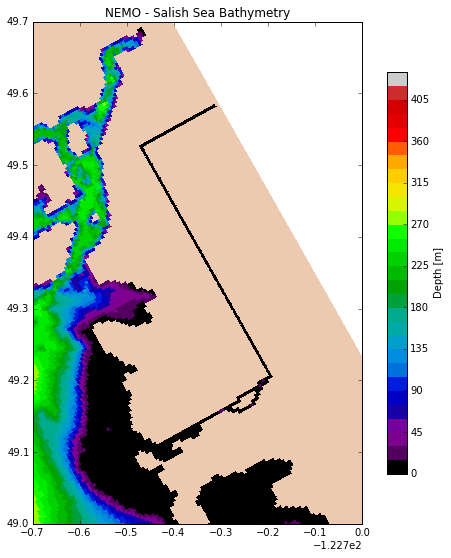

In [5]:
fig = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry', 
    axis_limits=(-123.4, -122.7, 49., 49.7), colour_map='spectral', bins=30)

(280, 340, 370, 460)

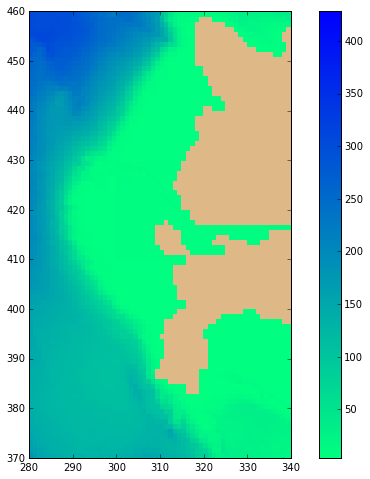

In [14]:
bath, X, Y = tidetools.get_bathy_data(bathy)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bath, cmap=cmap)
fig.colorbar(mesh)
plt.axis((280, 340, 370, 460))

In [24]:
## to put the range of lat, lon indices and bathymetry into list
lat_ind = []
lon_ind = []
remain_edit_bathy = []
for j in np.arange(370, 460):
    for i in np.arange(280, 340):
        if  (bathyy_9[j,i] <=4):
            #lat_ind.append(j)
            #lon_ind.append(i)
            #remain_edit_bathy.append(bathyy_9[j,i])
            bathyy_9[j,i] = np.ma.masked_values(bathyy_9[j,i], 4)
            #print (j,i)


In [31]:
bathy_9.close()

In [47]:
a= nc.Dataset('bathy_meter_SalishSea9.nc')

In [48]:
b= a.variables['Bathymetry']
b[427,288]

100.0